<a href="https://colab.research.google.com/github/fadyr1/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
#Convert Mnist
transform = transforms.ToTensor()
#Train Data
train_data=datasets.MNIST(root='/cnn_data',train=True,download=True,transform=transform)
#Test Data
test_data=datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 12.7MB/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)


In [ ]:
#Grab 1 MNIST Image
for i,(X_train,y_train) in enumerate(train_loader):
    break

In [ ]:
enumerate(train_loader)

In [ ]:
x=X_train.view(10,1,28,28)
x=F.relu(conv1(x))

TypeError: view() received an invalid combination of arguments - got (), but expected one of:
 * (torch.dtype dtype)
 * (tuple of ints size)


In [ ]:
train_loader

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
x.shape

torch.Size([10, 6, 26, 26])

In [ ]:
#pooling
x=F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([10, 6, 13, 13])

In [ ]:
x=F.relu(conv2(x))

In [ ]:
x.shape

torch.Size([10, 16, 11, 11])

In [ ]:
x=F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([10, 16, 5, 5])

In [ ]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,6,3,1)
    self.conv2=nn.Conv2d(6,16,3,1)
    self.fc1=nn.Linear(5*5*16,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)
  def forward(self,X):
    X=F.relu(self.conv1(X))
    X=F.max_pool2d(X,2,2)
    X=F.relu(self.conv2(X))
    X=F.max_pool2d(X,2,2)
    #review data to flat out
    X=X.view(-1,5*5*16)
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)
    return F.log_softmax(X, dim=1)

In [ ]:
torch.manual_seed(41)
model=ConvolutionalNetwork()

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
import time

#variables to track
epochs= 5
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
#Epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0

#train
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred=model(X_train)
    loss=criterion(y_pred,y_train)
    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if b%100==0:
      print(f'epoch:{i} loss:{loss.item()}')
  train_losses.append(loss)
  train_correct.append(trn_corr)
#test
  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()


  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)
start_time=time.time()
current_time=time.time()
total=current_time - start_time
print(f'Training: {total/60}')


epoch:0 loss:0.9812231063842773
epoch:0 loss:0.43812650442123413
epoch:0 loss:0.28931525349617004
epoch:0 loss:0.08598048985004425
epoch:0 loss:0.33633095026016235
epoch:0 loss:0.1623610556125641
epoch:0 loss:0.5226176977157593
epoch:0 loss:0.6974474191665649
epoch:0 loss:0.20160897076129913
epoch:0 loss:0.5349848866462708
epoch:0 loss:0.8624889254570007
epoch:0 loss:0.1502392590045929
epoch:0 loss:0.025196203961968422
epoch:0 loss:0.3291054666042328
epoch:0 loss:0.055179618299007416
epoch:0 loss:0.05321278050541878
epoch:0 loss:0.07852675765752792
epoch:0 loss:0.4744560718536377
epoch:0 loss:0.03948891535401344
epoch:0 loss:0.5566567182540894
epoch:0 loss:0.026368603110313416
epoch:0 loss:0.05482446029782295
epoch:0 loss:0.04502648860216141
epoch:0 loss:0.14238706231117249
epoch:0 loss:0.09642040729522705
epoch:0 loss:0.04012634977698326
epoch:0 loss:0.018391495570540428
epoch:0 loss:0.03186991065740585
epoch:0 loss:0.10387355089187622
epoch:0 loss:0.007758188061416149
epoch:0 loss:0.

In [ ]:

test_correct

[tensor(9771), tensor(9817), tensor(9802), tensor(9875), tensor(9857)]

In [ ]:
train_correct

[tensor(56257), tensor(58786), tensor(59148), tensor(59313), tensor(59461)]

In [ ]:
predicted

tensor([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

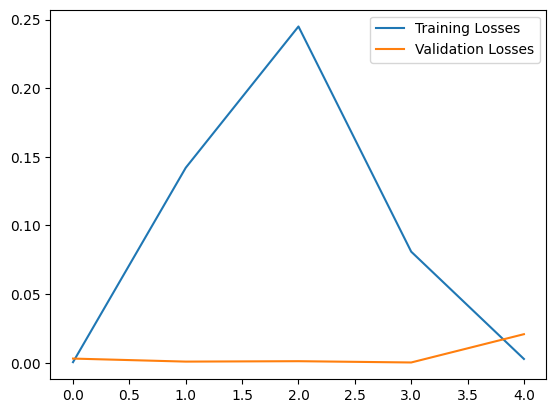

In [ ]:
train_losses=[tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Losses")
plt.plot(test_losses, label="Validation Losses")

plt.legend()
plt.show()

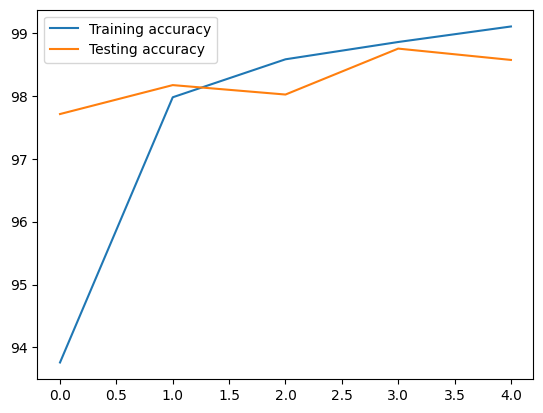

In [ ]:
#accuracy
plt.plot([t/600 for t in train_correct], label="Training accuracy")
plt.plot([t/100 for t in test_correct], label="Testing accuracy")
plt.legend()

In [ ]:
test_load_everything=DataLoader(test_data, batch_size=10000, shuffle=False)
with torch.no_grad():
  correct=0
  for X_test, y_test in test_load_everything:
    y_val=model(X_test)
    predicted=torch.max(y_val.data,1)[1]
    correct+=(predicted==y_test).sum()
    print(predicted)


tensor([7, 2, 1,  ..., 4, 5, 6])


9857

In [ ]:
#Grab image
img=test_data[500][0].reshape(28,28)

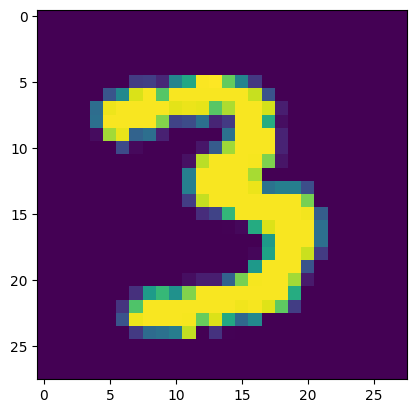

In [ ]:
plt.imshow(img)

In [ ]:
model.eval()
with torch.no_grad():
  new_prediction=model(img.view(1,1,28,28))


In [ ]:
new_prediction.argmax()

tensor(3)